<h1 class="text_center">Project description</h1><br>
This work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. We need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.


<h3 class="text_center">Data description</h3>

- **—Name**<br> 
- **—Platform**<br> 
- **—Year_of_Release**<br> 
- **—Genre**<br> 
- **—NA_sales** (North American sales in USD million)<br> 
- **—EU_sales** (sales in Europe in USD million)<br> 
- **—JP_sales** (sales in Japan in USD million)<br> 
- **—Other_sales** (sales in other countries in USD million)<br> 
- **—Critic_Score** (maximum of 100)<br> 
- **—User_Score** (maximum of 10)<br> 
- **—Rating** (ESRB)<br> 

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


In [5]:
df = pd.read_csv('./games.csv')


In [6]:
df.columns = map(lambda x: x.lower(), df.columns)
df.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
for column in ['year_of_release', 'critic_score']:
    df[column] = df[column].astype('Int32')
    
df = df[df['name'].notna()]


In [9]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df['user_score'] = pd.to_numeric(df['user_score'], errors='ignore')


In [10]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(10)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [11]:
df.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
total_sales           0
dtype: int64

<h3 style='text-align: center'>Conclusion: about missing values</h3><br>
<div>I can't change NaN in columns <bold>critic_score, user_score, rating</bold> because it can change results of analyse. This mark can be very low from critics but sales high. We can't take mean or medium.</div>

Text(0.5, 0.98, 'Years of release')

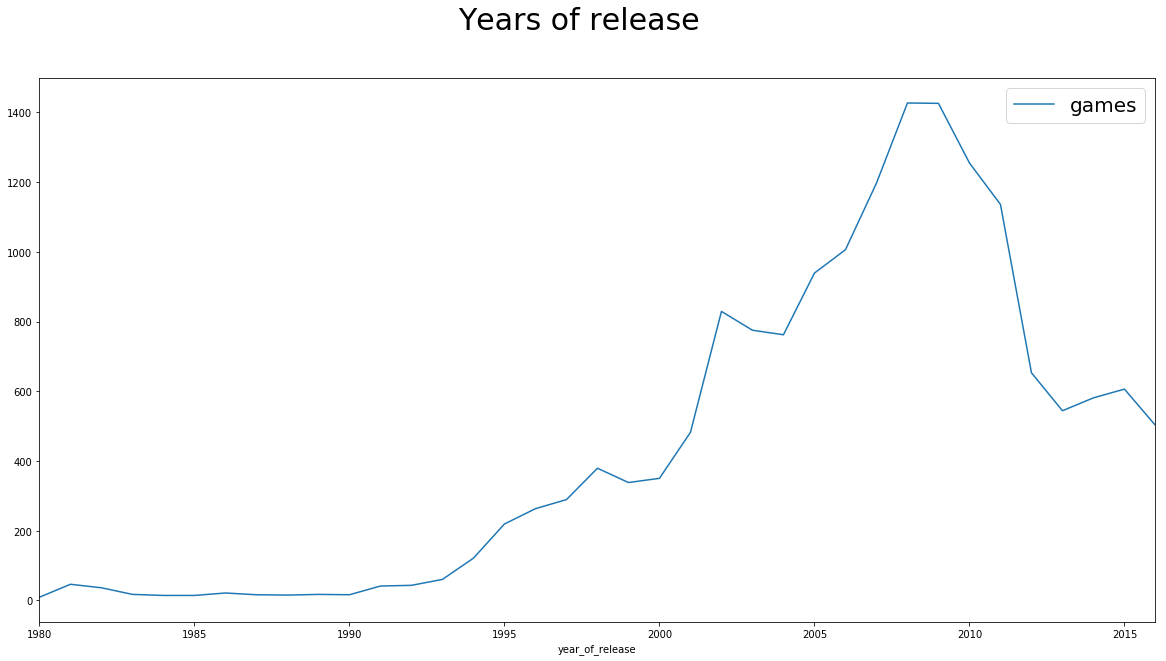

In [12]:
games_of_years = df.pivot_table(index='year_of_release', values='name', aggfunc='count')

fig, ax = plt.subplots(figsize=(20, 10))
games_of_years.plot(ax=ax)
ax.legend(['games'], fontsize=20)

fig.suptitle('Years of release', fontsize=30)


The graph shows that in about 1993, a small rise in the production of games began , as the IT sphere began to grow, computers began to be sold EN masse, and the Internet will soon appear. In 2001, the big race, I can not specifically justify something in 2006. After the production of games went into decline due to the filling of the market , apparently all that could be done already. I think the next boom in computer games will be related to 3D games, which will happen soon, in the next 5-10 years.

Text(0.5, 0, 'Sales in million')

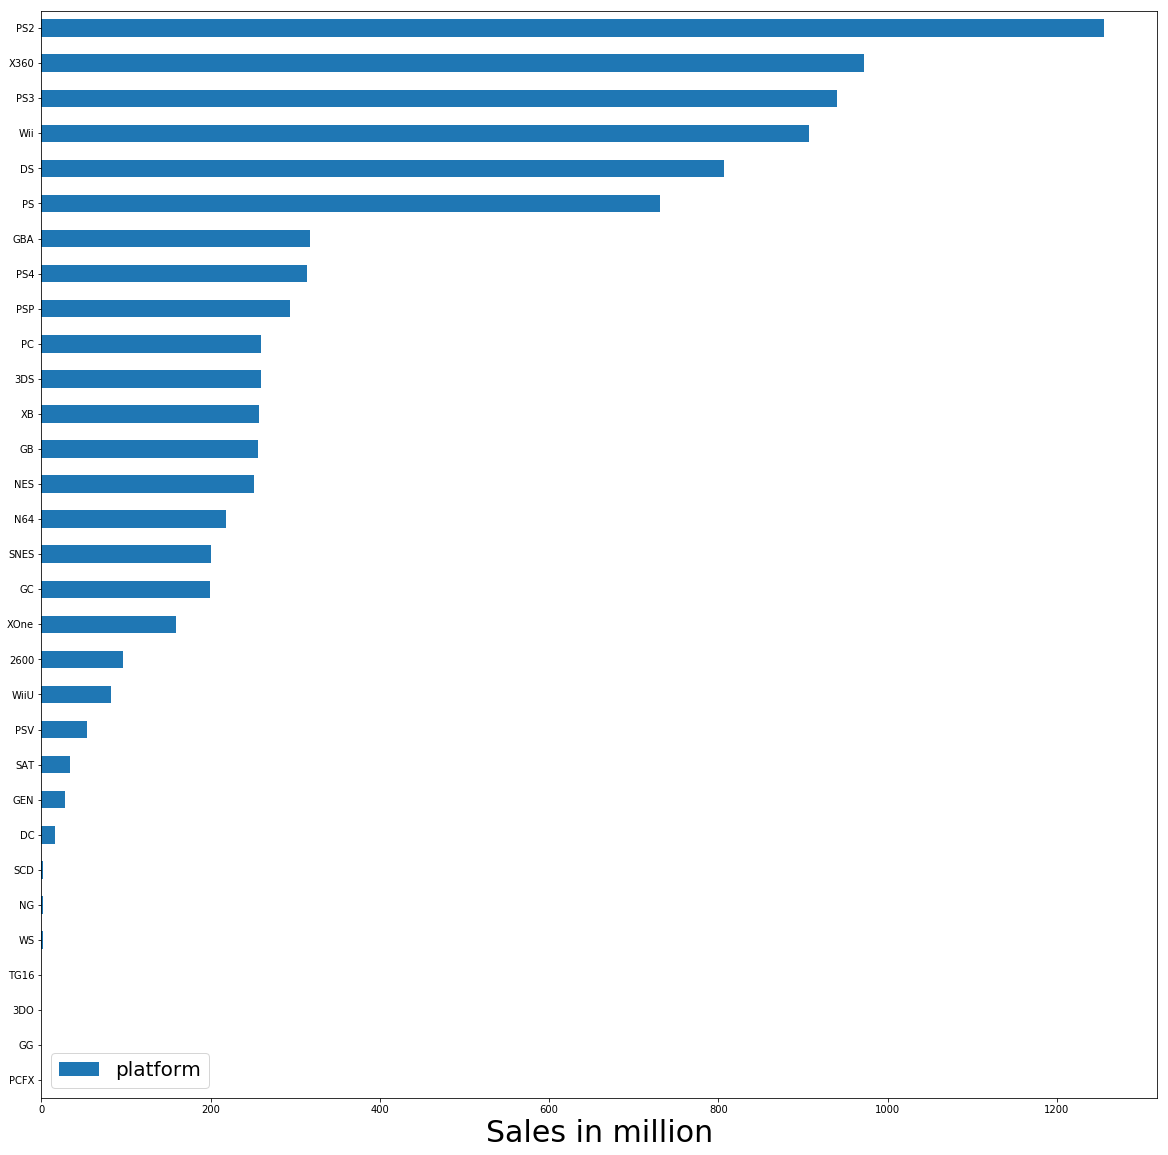

In [13]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values()

fig, ax = plt.subplots(figsize=(20, 20))
platform_sales.plot.barh(ax=ax)
ax.legend(['platform'], fontsize=20)
ax.set_ylabel('')
ax.set_xlabel('Sales in million', fontsize=30)


In [14]:
def filterPlatform(platform):
    if platforms_dict[platform]:
        return platform
    return 'Other'


platforms_dict = dict(df.pivot_table(index='platform', values='total_sales', aggfunc='sum')['total_sales'] > 250)

df['platform_filter'] = df['platform'].apply(filterPlatform)


In [15]:
df['platform_filter'].value_counts()


Other    2354
PS2      2161
DS       2151
PS3      1331
Wii      1320
X360     1262
PSP      1209
PS       1197
PC        974
XB        824
GBA       822
3DS       520
PS4       392
NES        98
GB         98
Name: platform_filter, dtype: int64

In [16]:
df['platform_filter'].value_counts().count()


15

In [17]:
platform_counts_years = df.pivot_table(index=['platform_filter', 'year_of_release'], values='total_sales', aggfunc='count').sort_index(level=0)


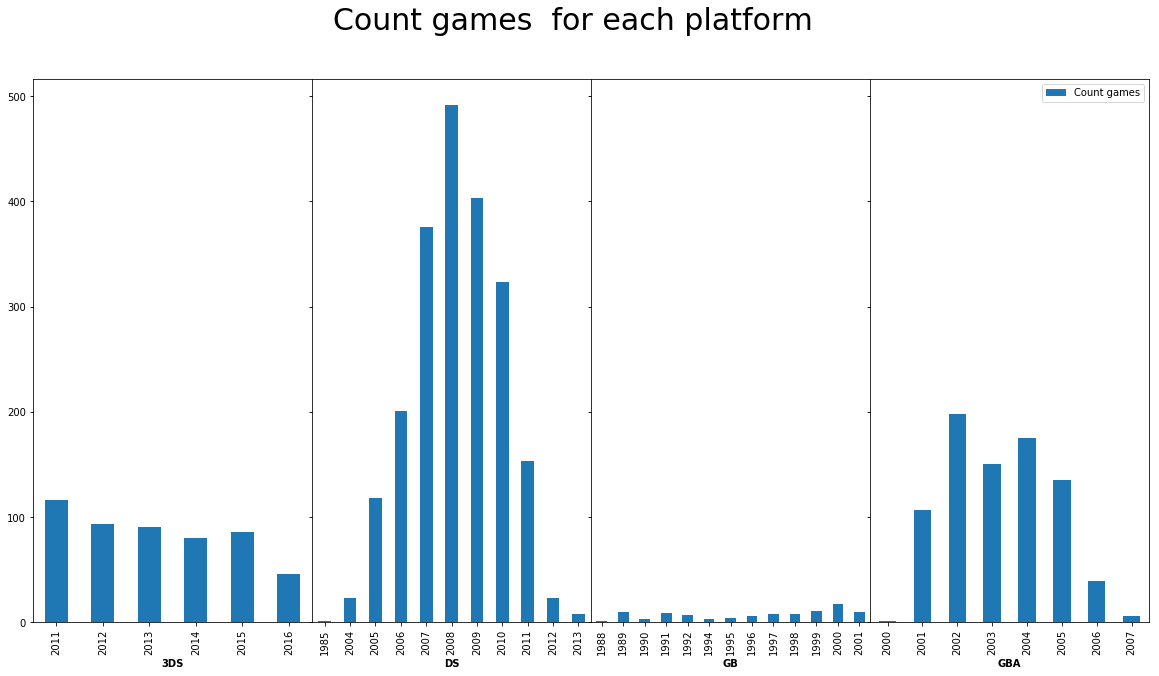

In [18]:
def plot_function(x, ax, data):
    ax = graph[x]
    result = data.xs(x).plot(kind='bar', ax=ax, legend=False)
    ax.set_xlabel(x, weight='bold')
    return result


fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(20, 10))

graph = dict(zip(platform_counts_years.index.levels[0][:4], axes))
plots = list(map(lambda x: plot_function(x, graph[x], platform_counts_years), graph))

fig.subplots_adjust(wspace=0)

fig.suptitle('Count games  for each platform', fontsize=30)
plt.legend(['Count games'])
plt.show()


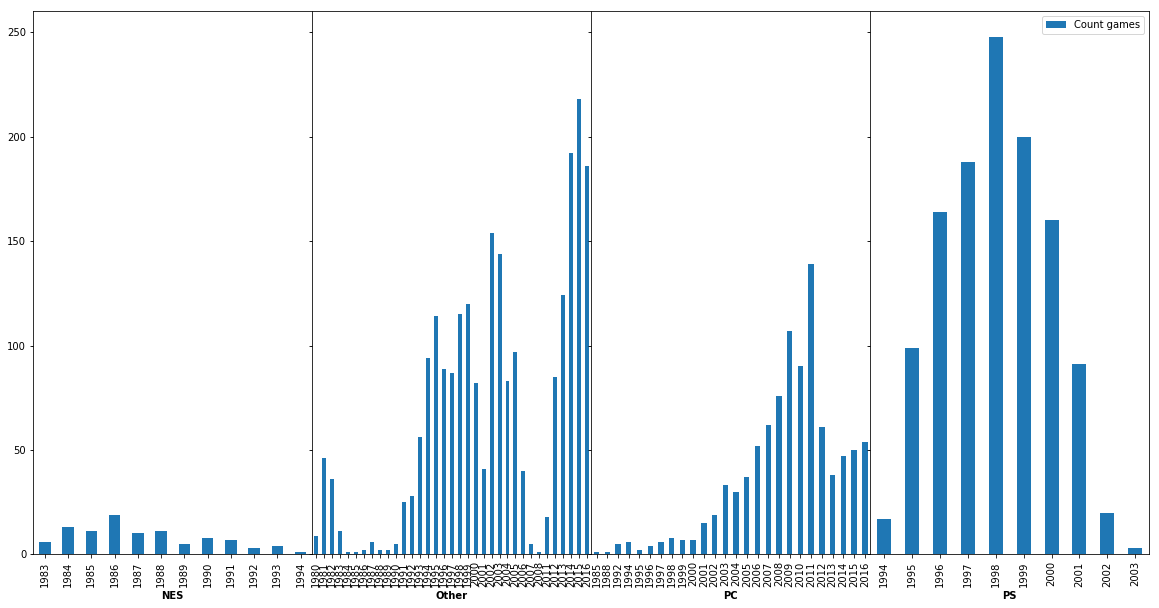

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(20, 10))

graph = dict(zip(platform_counts_years.index.levels[0][4:8], axes))
plots = list(map(lambda x: plot_function(x, graph[x], platform_counts_years), graph))

fig.subplots_adjust(wspace=0)

plt.legend(['Count games'])
plt.show()


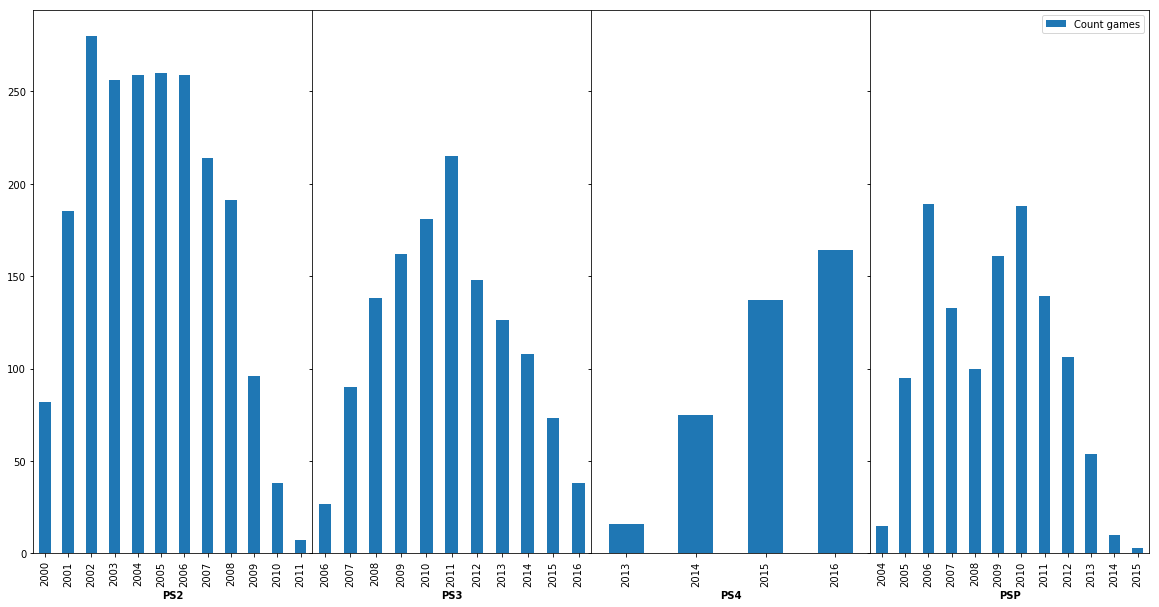

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(20, 10))

graph = dict(zip(platform_counts_years.index.levels[0][8:12], axes))
plots = list(map(lambda x: plot_function(x, graph[x], platform_counts_years), graph))

fig.subplots_adjust(wspace=0)

plt.legend(['Count games'])
plt.show()


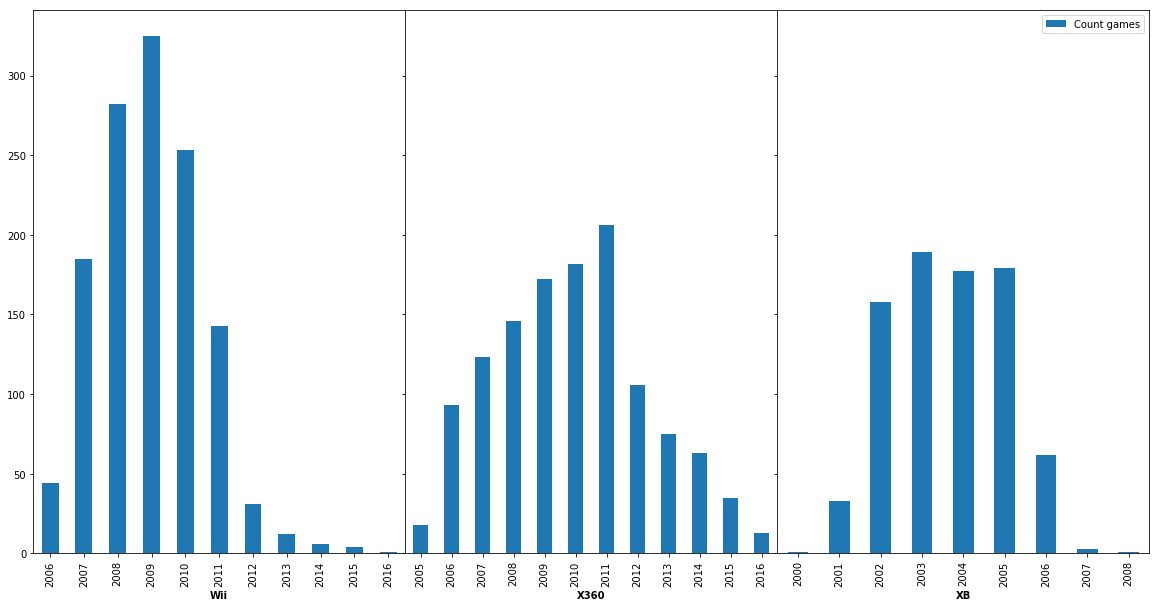

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 10))

graph = dict(zip(platform_counts_years.index.levels[0][12:15], axes))
plots = list(map(lambda x: plot_function(x, graph[x], platform_counts_years), graph))

fig.subplots_adjust(wspace=0)

plt.legend(['Count games'])
plt.show()


<div>The graphs show that after the release of new generation consoles such as PS-PS2-PS3-PS4 trade games for old consoles fading in 3-6 years , similar to the production of games for the new console grows for 3-6 years before the peak.</div>

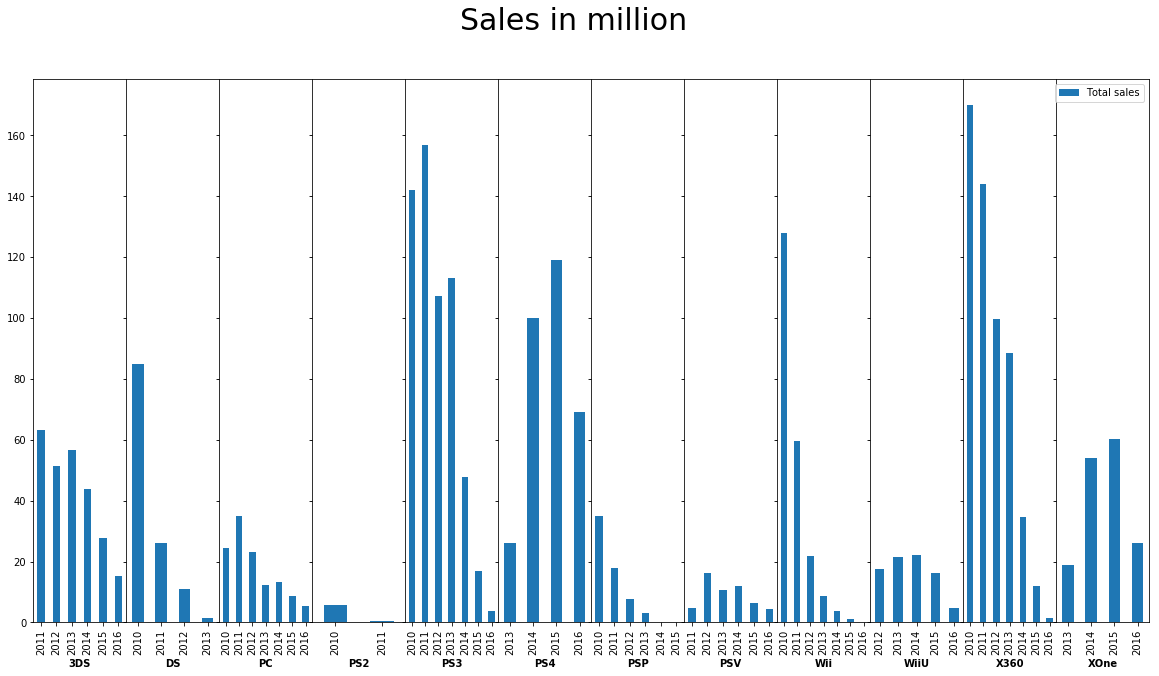

In [22]:
df_year_more_2009 = df[df['year_of_release'] > 2009]
platform_sales = df_year_more_2009.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').sort_index(level=0)

fig, axes = plt.subplots(nrows=1, ncols=12, sharey=True, figsize=(20, 10))

graph = dict(zip(platform_sales.index.levels[0][:12], axes))
plots = list(map(lambda x: plot_function(x, graph[x], platform_sales), graph))

fig.subplots_adjust(wspace=0)

fig.suptitle('Sales in million', fontsize=30)
plt.legend(['Total sales'])
plt.show()


<div>As you can see from the charts above, by 2016, sales of all platforms had fallen. The only leaders were the PS4 and XOne.</div>

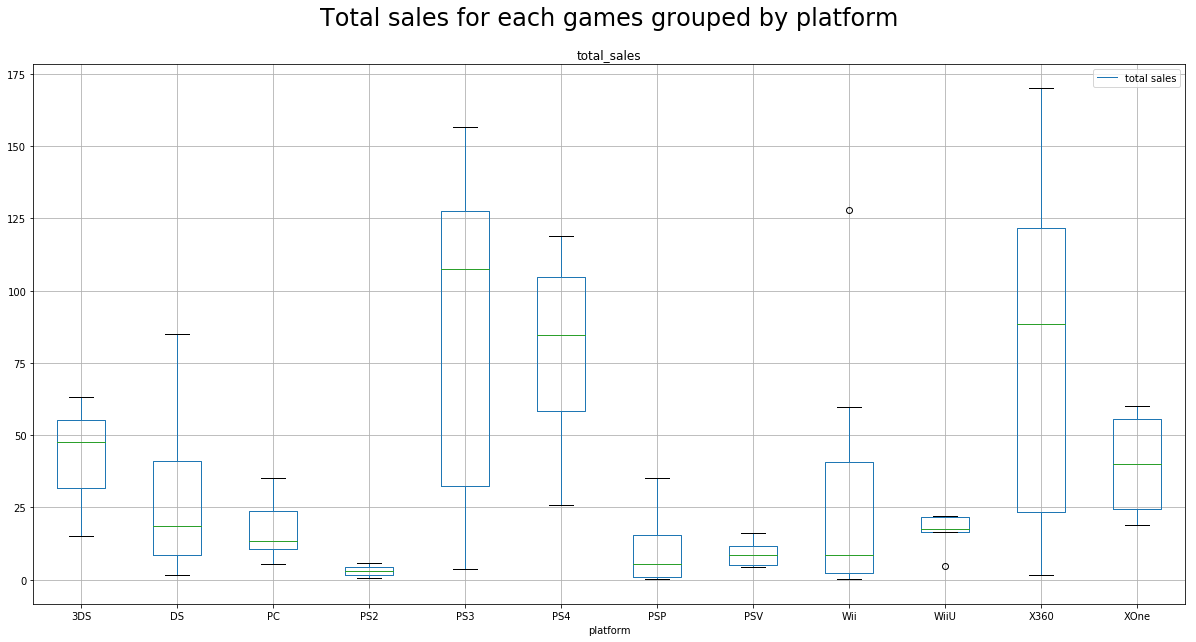

In [23]:
platform_sales.boxplot(by='platform', column='total_sales', figsize=(20,10))


plt.suptitle('Total sales for each games grouped by platform', fontsize=24)
plt.legend(['total sales'])
plt.show()


In [24]:
platform_sales.reset_index().pivot_table(index='year_of_release', columns='platform', values='total_sales').describe()


platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,6.000000,4.000000,7.000000,2.000000,7.000000,4.000000,6.000000,6.000000,7.000000,5.000000,7.000000,4.000000
mean,42.968333,30.937500,17.422857,3.045000,83.962857,78.535000,10.675000,8.968333,31.852857,16.438000,78.630000,39.830000
std,18.278261,37.456058,10.493424,3.669884,61.063587,40.567917,13.643225,4.729695,47.236286,7.068244,65.151249,20.313977
min,15.140000,1.540000,5.250000,0.450000,3.600000,25.990000,0.120000,4.250000,0.180000,4.600000,1.520000,18.960000
25%,31.775000,8.642500,10.450000,1.747500,32.290000,58.435000,0.965000,5.035000,2.445000,16.350000,23.350000,24.352500
50%,47.560000,18.595000,13.280000,3.045000,107.360000,84.625000,5.415000,8.420000,8.590000,17.560000,88.580000,40.110000
75%,55.267500,40.890000,23.750000,4.342500,127.710000,104.725000,15.287500,11.572500,40.680000,21.650000,121.790000,55.587500
max,63.200000,85.020000,35.030000,5.640000,156.780000,118.900000,35.040000,16.190000,127.950000,22.030000,170.030000,60.140000


<div>We can see from the boxplot charts that the main two platforms PS3 and X360 have almost the same sales volume, but you can also see that the PS4 is catching up in volume and most likely will overtake them in the next couple of years.</div>

In [25]:
corr = df_year_more_2009[['total_sales', 'critic_score', 'user_score']].corr()
corr.style.background_gradient(cmap='coolwarm')

,total_sales,critic_score,user_score
total_sales,1,0.317012,0.0553646
critic_score,0.317012,1,0.550646
user_score,0.0553646,0.550646,1


Text(0.5, 0.98, 'Correlation between critical score and total sales')

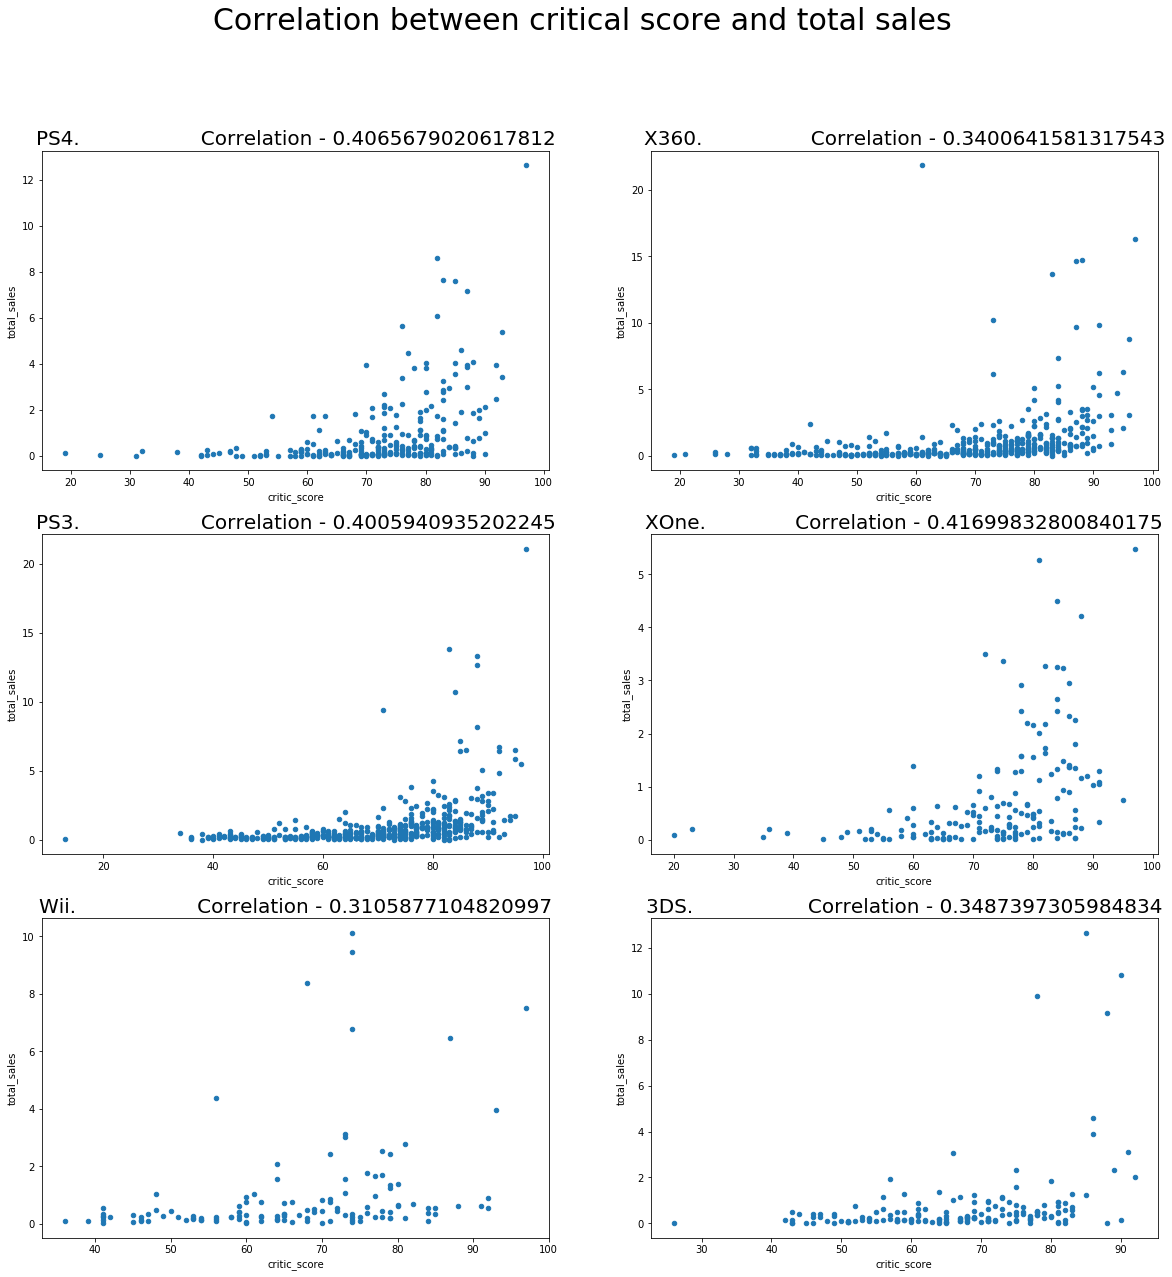

In [26]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

df_year_more_2009.query('platform == "PS4"').plot.scatter(x='critic_score', y='total_sales', ax=axs[0, 0])
axs[0, 0].set_title('PS4.                   Correlation - {}'.format(df_year_more_2009.query('platform == "PS4"').corr()['total_sales'][5]), fontsize=20)

df_year_more_2009.query('platform == "X360"').plot.scatter(x='critic_score', y='total_sales', ax=axs[0, 1])
axs[0, 1].set_title('X360.                 Correlation - {}'.format(df_year_more_2009.query('platform == "X360"').corr()['total_sales'][5]), fontsize=20)

df_year_more_2009.query('platform == "PS3"').plot.scatter(x='critic_score', y='total_sales', ax=axs[1, 0])
axs[1, 0].set_title('PS3.                   Correlation - {}'.format(df_year_more_2009.query('platform == "PS3"').corr()['total_sales'][5]), fontsize=20)

df_year_more_2009.query('platform == "XOne"').plot.scatter(x='critic_score', y='total_sales', ax=axs[1, 1])
axs[1, 1].set_title('XOne.              Correlation - {}'.format(df_year_more_2009.query('platform == "XOne"').corr()['total_sales'][5]), fontsize=20)

df_year_more_2009.query('platform == "Wii"').plot.scatter(x='critic_score', y='total_sales', ax=axs[2, 0])
axs[2, 0].set_title('Wii.                   Correlation - {}'.format(df_year_more_2009.query('platform == "Wii"').corr()['total_sales'][5]), fontsize=20)

df_year_more_2009.query('platform == "3DS"').plot.scatter(x='critic_score', y='total_sales', ax=axs[2, 1])
axs[2, 1].set_title('3DS.                  Correlation - {}'.format(df_year_more_2009.query('platform == "3DS"').corr()['total_sales'][5]), fontsize=20)

plt.suptitle('Correlation between critical score and total sales', fontsize=30)


Text(0.5, 0.98, 'Correlation between user score and total sales')

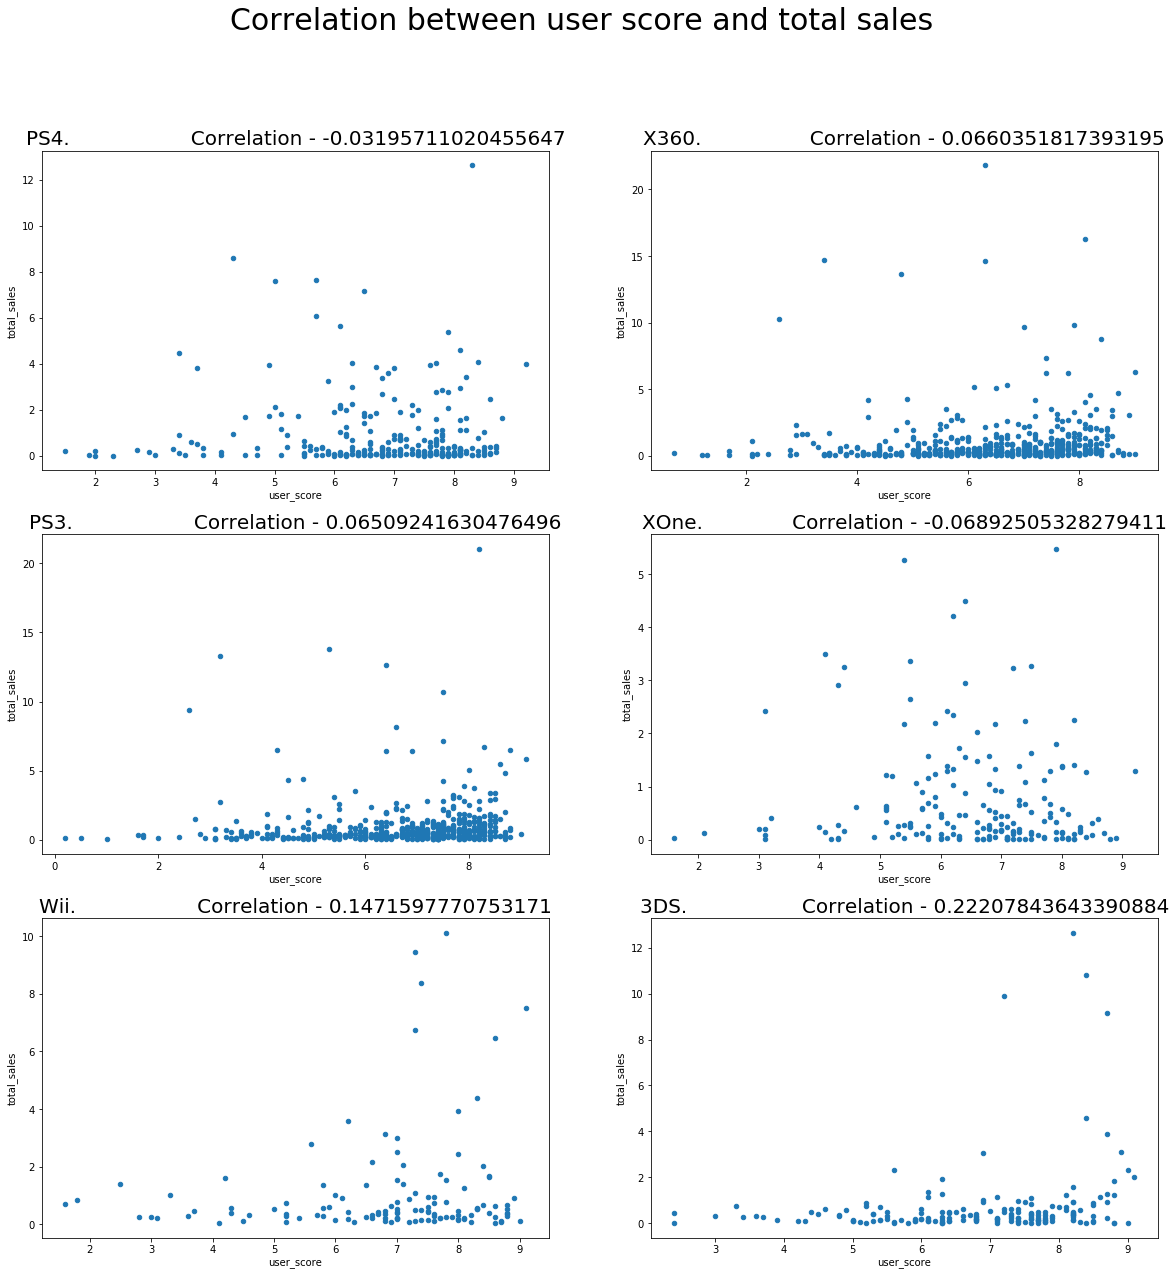

In [27]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

df_year_more_2009.query('platform == "PS4"').plot.scatter(x='user_score', y='total_sales', ax=axs[0, 0])
axs[0, 0].set_title('PS4.                   Correlation - {}'.format(df_year_more_2009.query('platform == "PS4"').corr()['total_sales'][6]), fontsize=20)

df_year_more_2009.query('platform == "X360"').plot.scatter(x='user_score', y='total_sales', ax=axs[0, 1])
axs[0, 1].set_title('X360.                 Correlation - {}'.format(df_year_more_2009.query('platform == "X360"').corr()['total_sales'][6]), fontsize=20)

df_year_more_2009.query('platform == "PS3"').plot.scatter(x='user_score', y='total_sales', ax=axs[1, 0])
axs[1, 0].set_title('PS3.                   Correlation - {}'.format(df_year_more_2009.query('platform == "PS3"').corr()['total_sales'][6]), fontsize=20)

df_year_more_2009.query('platform == "XOne"').plot.scatter(x='user_score', y='total_sales', ax=axs[1, 1])
axs[1, 1].set_title('XOne.              Correlation - {}'.format(df_year_more_2009.query('platform == "XOne"').corr()['total_sales'][6]), fontsize=20)

df_year_more_2009.query('platform == "Wii"').plot.scatter(x='user_score', y='total_sales', ax=axs[2, 0])
axs[2, 0].set_title('Wii.                   Correlation - {}'.format(df_year_more_2009.query('platform == "Wii"').corr()['total_sales'][6]), fontsize=20)

df_year_more_2009.query('platform == "3DS"').plot.scatter(x='user_score', y='total_sales', ax=axs[2, 1])
axs[2, 1].set_title('3DS.                  Correlation - {}'.format(df_year_more_2009.query('platform == "3DS"').corr()['total_sales'][6]), fontsize=20)

plt.suptitle('Correlation between user score and total sales', fontsize=30)


<div>There is a slight dependence of game sales on the assessment of professionals. However, there is almost no correlation between user ratings.</div>

In [30]:
dict_nam_games = dict(df_year_more_2009['name'].value_counts() > 2)
counter = 0
keys= []
for key in dict_nam_games:
    if counter > 10:
        break
    keys.append(key)
    counter += 1


Text(0.5, 0.98, 'Total sales for top 10 games')

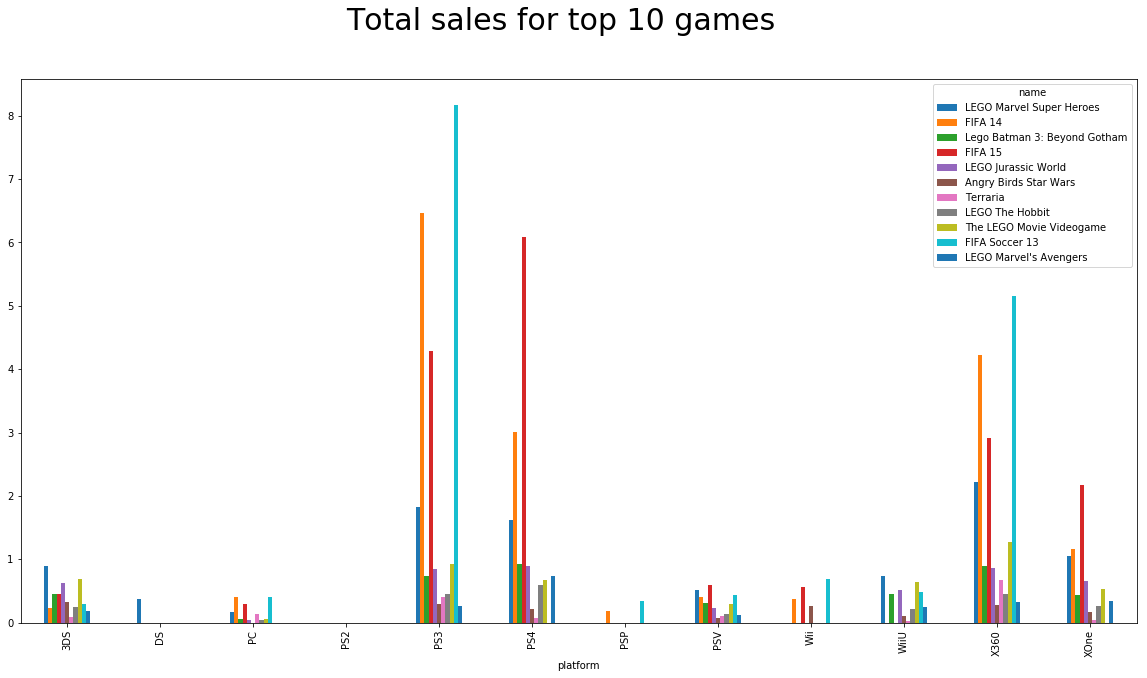

In [31]:
fig, ax = plt.subplots(figsize=(20, 10))
df_year_more_2009.pivot_table(index='platform', columns='name', values='total_sales')[keys].plot(kind='bar', ax=ax)

fig.suptitle('Total sales for top 10 games', fontsize=30)


Text(0.5, 0.98, 'Count of games by genre')

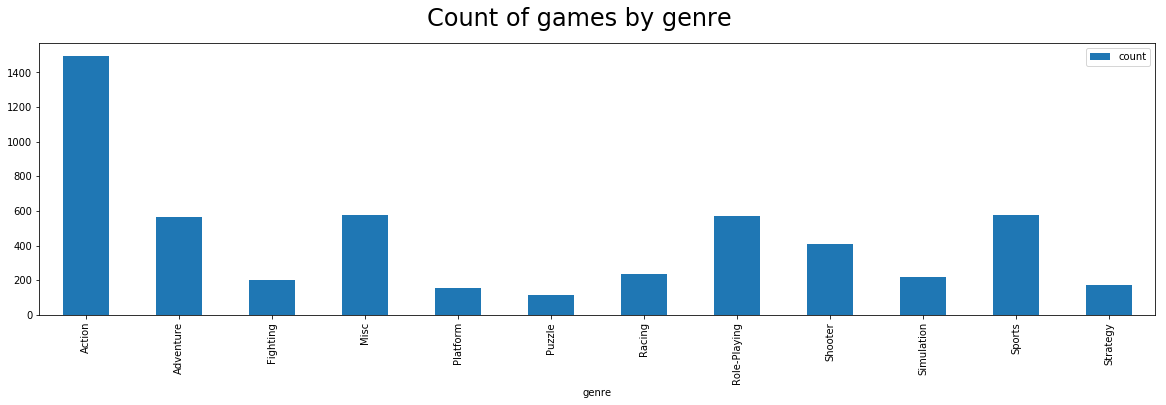

In [32]:
df_year_more_2009.pivot_table(index='genre', values='total_sales', aggfunc='count').plot(kind='bar', figsize=(20,5))

plt.legend(['count'])
plt.suptitle('Count of games by genre', fontsize=24)


Text(0.5, 0.98, 'Total sales by genre')

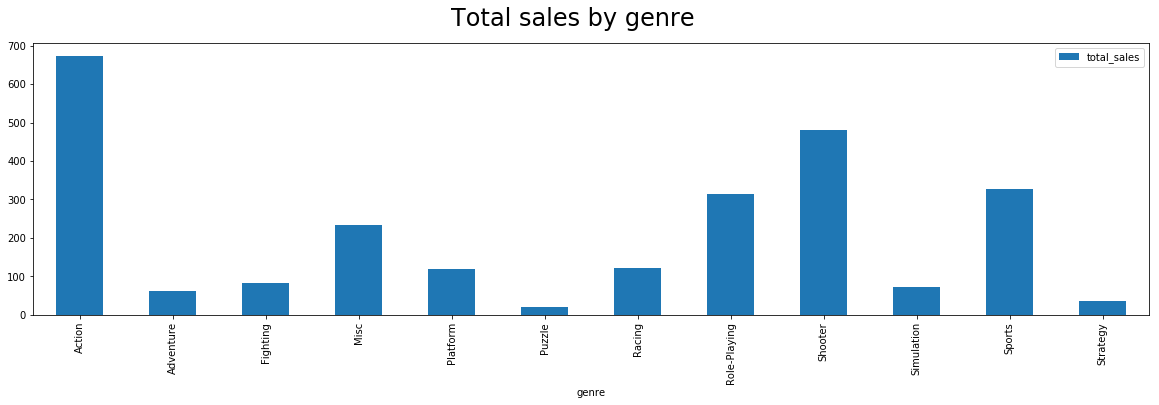

In [33]:
df_year_more_2009.pivot_table(index='genre', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(20,5))

plt.suptitle('Total sales by genre', fontsize=24)


<div>The graph shows that genre: <b>'Action'</b> is issued by the number of games and that it is quite logical for profit. <b>'Sports'</b> & <b>'Shooter'</b> & <b>'Role-Playing'</b> is in second place and their number of games is approximately equal to each genre. However, <b>'Shooter'</b> stands out by the amount of money earned.</div>

<h3 style="text-align: center">Conclusion</h3><br>
<div>
    
- in 2001 and 2006 was big jump to release games. In 2008 and 2009 count of games reached a maximum, then began to decline. Most likely, the next jump that humanity will be able to overcome this peak of 1500 games per open up from the side of technology and change the understanding of games as such.

- in General, several major platforms on the PS, Xbox, Wii and DS market have high sales.

- after the release of the new generation platform, it takes about 3-6 years on average for the old one to lose popularity, and the new one to gain it. This is due to the fact that most customers still have old consoles and they are not ready to buy a new one immediately after the release, but over time, most users buy a console and stop using the old version.

- as you can see from the charts above, by 2016, sales of all platforms had fallen. The only leaders were the PS4 and XOne.

- we can see from the boxplot charts that the main two platforms PS3 and X360 have almost the same sales volume, but you can also see that the PS4 is catching up in volume and most likely will overtake them in the next couple of years.

- there is a slight dependence of game sales on the assessment of professionals. However, there is almost no correlation between user ratings.

- when the game is released on several platforms, games on the PS or XBox platform are gaining popularity.

- the graph shows that genre: <b>'Action'</b> is issued by the number of games and that it is quite logical for profit. <b>'Sports'</b> & <b>'Shooter'</b> & <b>'Role-Playing'</b> is in second place and their number of games is approximately equal to each genre. However, <b>'Shooter'</b> stands out by the amount of money earned.
</div>



<h3 style="text-align: center">Create a user profile for each region</h3>

In [34]:
df_year_more_2009

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_filter
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82,X360
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05,PS3
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27,X360
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13,DS
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73,X360
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,Other
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,Other
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,PS3
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,Other


Text(0.5, 0.98, 'Sales for each region grouped by platform')

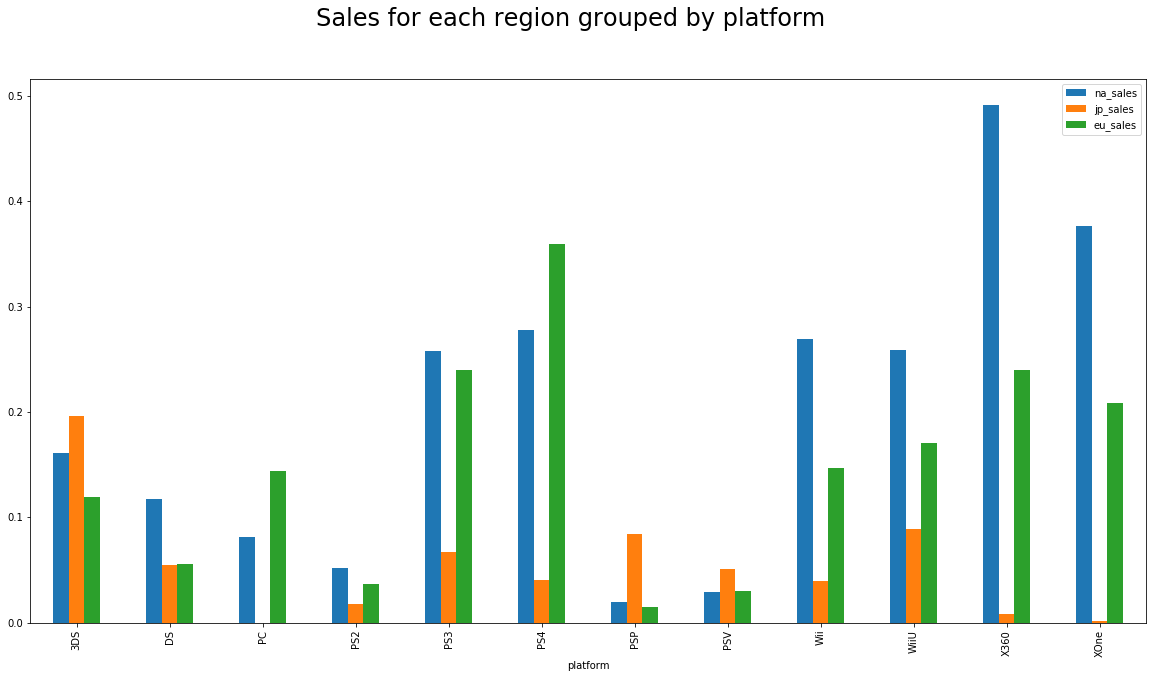

In [35]:
fig, ax = plt.subplots(figsize=(20, 10))

df_year_more_2009.pivot_table(index='platform')[['na_sales', 'jp_sales', 'eu_sales']].plot(kind='bar', ax=ax)

plt.suptitle('Sales for each region grouped by platform', fontsize=24)


Text(0.5, 1.0, 'EU')

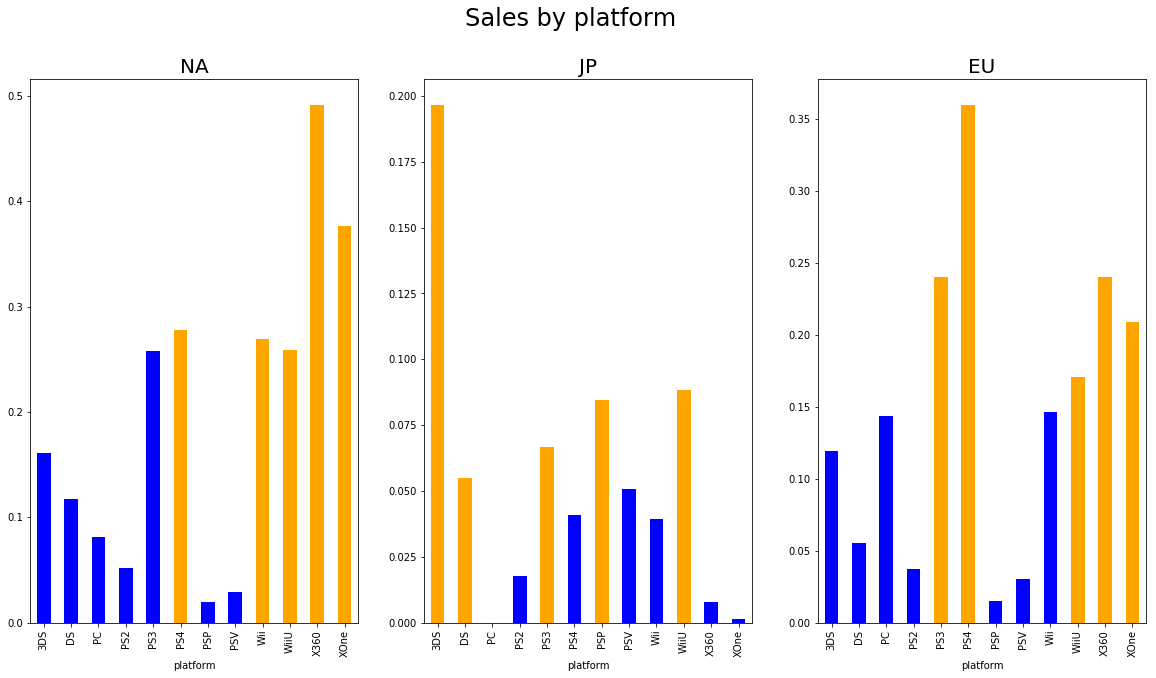

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

barplot_na = df_year_more_2009.pivot_table(index='platform')[['na_sales']]

barplot_na['na_sales'].plot(kind = 'bar', ax = ax[0], color = (barplot_na['na_sales'] > 0.258).map({True: 'orange', False: 'b'}))

barplot_jp = df_year_more_2009.pivot_table(index='platform')[['jp_sales']]

barplot_jp['jp_sales'].plot(kind = 'bar', ax = ax[1], color = (barplot_jp['jp_sales'] > 0.055).map({True: 'orange', False: 'b'}))

barplot_eu = df_year_more_2009.pivot_table(index='platform')[['eu_sales']]

barplot_eu['eu_sales'].plot(kind = 'bar', ax = ax[2], color = (barplot_eu['eu_sales'] > 0.15).map({True: 'orange', False: 'b'}))

plt.suptitle('Sales by platform', fontsize=24)

ax[0].set_title('NA', fontsize=20)
ax[1].set_title('JP', fontsize=20)
ax[2].set_title('EU', fontsize=20)


Text(0.5, 1.0, 'EU')

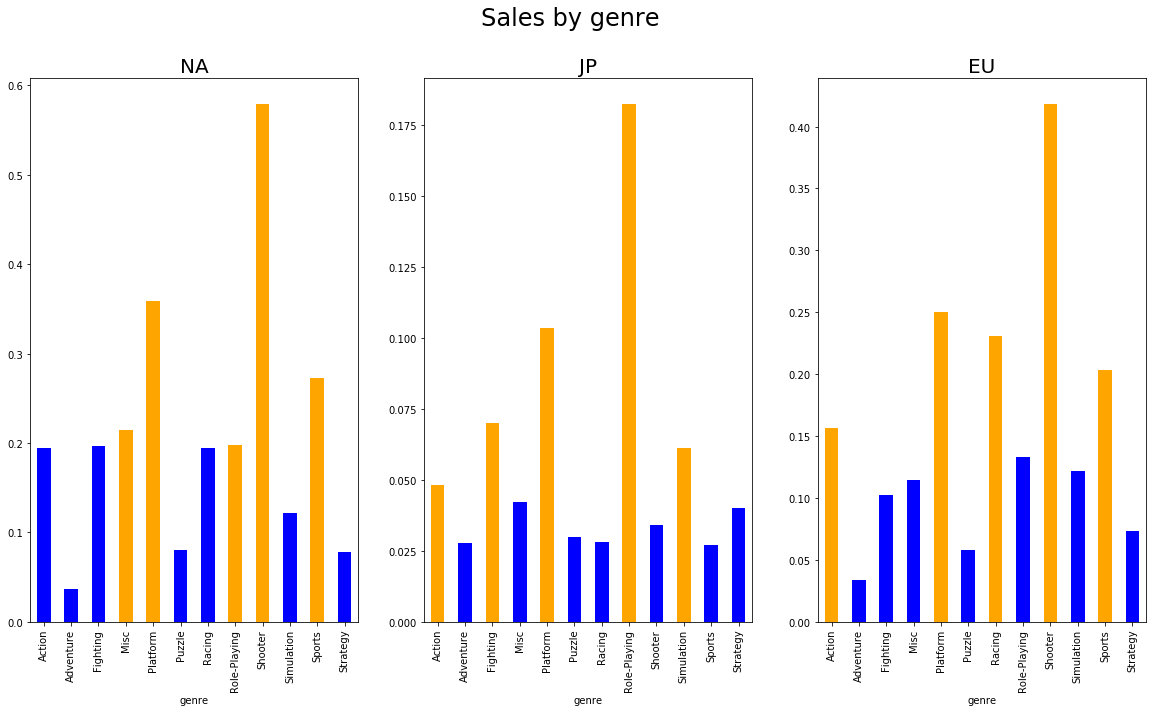

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

barplot_na = df_year_more_2009.pivot_table(index='genre')[['na_sales']]

barplot_na['na_sales'].plot(kind = 'bar', ax = ax[0], color = (barplot_na['na_sales'] > 0.197).map({True: 'orange', False: 'b'}))

barplot_jp = df_year_more_2009.pivot_table(index='genre')[['jp_sales']]

barplot_jp['jp_sales'].plot(kind = 'bar', ax = ax[1], color = (barplot_jp['jp_sales'] > 0.045).map({True: 'orange', False: 'b'}))

barplot_eu = df_year_more_2009.pivot_table(index='genre')[['eu_sales']]

barplot_eu['eu_sales'].plot(kind = 'bar', ax = ax[2], color = (barplot_eu['eu_sales'] > 0.15).map({True: 'orange', False: 'b'}))

plt.suptitle('Sales by genre', fontsize=24)

ax[0].set_title('NA', fontsize=20)
ax[1].set_title('JP', fontsize=20)
ax[2].set_title('EU', fontsize=20)

Text(0.5, 1.0, 'EU')

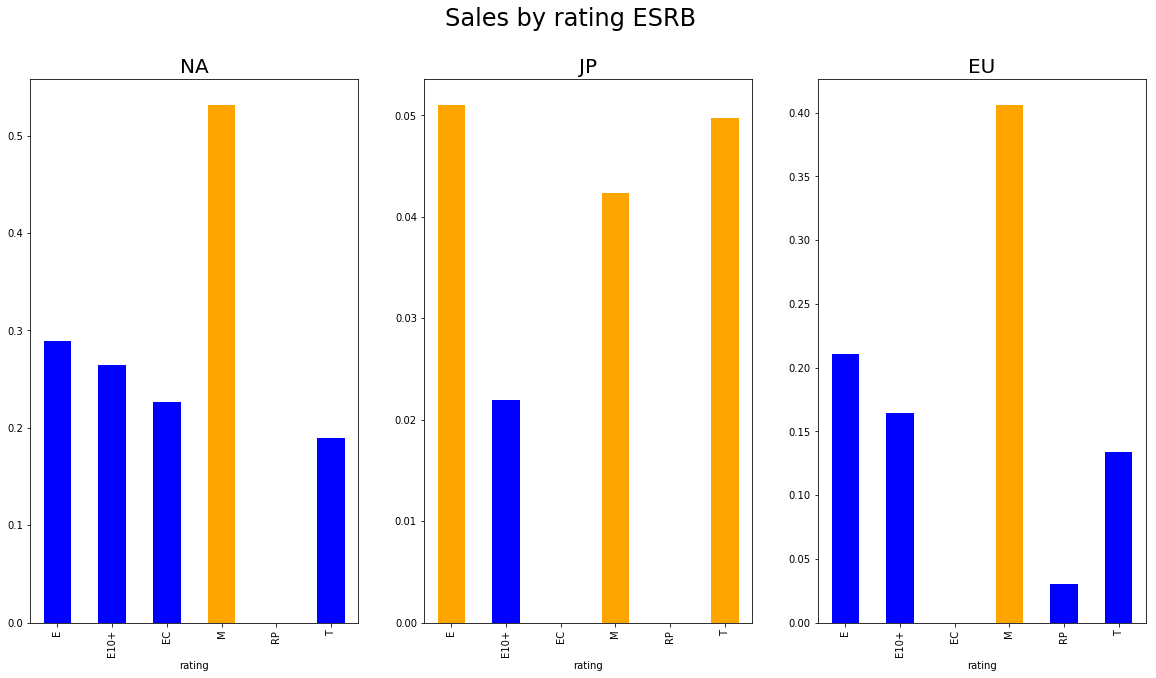

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

barplot_na = df_year_more_2009.pivot_table(index='rating')[['na_sales']]

barplot_na['na_sales'].plot(kind = 'bar', ax = ax[0], color = (barplot_na['na_sales'] > 0.3).map({True: 'orange', False: 'b'}))

barplot_jp = df_year_more_2009.pivot_table(index='rating')[['jp_sales']]

barplot_jp['jp_sales'].plot(kind = 'bar', ax = ax[1], color = (barplot_jp['jp_sales'] > 0.03).map({True: 'orange', False: 'b'}))

barplot_eu = df_year_more_2009.pivot_table(index='rating')[['eu_sales']]

barplot_eu['eu_sales'].plot(kind = 'bar', ax = ax[2], color = (barplot_eu['eu_sales'] > 0.3).map({True: 'orange', False: 'b'}))

plt.suptitle('Sales by rating ESRB', fontsize=24)

ax[0].set_title('NA', fontsize=20)
ax[1].set_title('JP', fontsize=20)
ax[2].set_title('EU', fontsize=20)


<h3 style="text-align: center">Conclusion</h3><br>

<div>
    
1. sales in General for each platform are higher in NA, but mostly XBox prevails. For PS4 and XBox more in Europe, and for 3DS more in JP. I can assume that the sales of the 3DS platform are more in OZ, because it is a platform produced from Japan, as well as the Nintendo company itself - this is their market. In America, the XBox market took over, and in Europe, the PS.

2. genre in:
    - NA is dominated by "Shooter", " Platform "and"Sports". 
    - JP is dominated by "Role-Playing", "Platform" and "Fighting". 
    - EU is dominated by "Shooter", "Platform"and " Sports". 

3. In Europe and America, the same types of games are preferred.

    - in America, rating M, in JP E, M and T prevail, in Europe, rating Master prevails.

4. In Japan, both children and adults play, while in America and Europe, mostly teenagers.
</div>



<h3 style="text-align: center">Test the following hypotheses:</h3>

<span style="font-size: 16px">1st hypothesis:</span>

H0: the average user ratings of the Xbox One and PC platforms are the same.<br>
H1: the average user ratings of the Xbox One and PC platforms are different.<br>
Threshold p-value = 0.05.

In [39]:
XOne_user_rating = df_year_more_2009.query('platform == "XOne"')['user_score']
PC_user_rating = df_year_more_2009.query('platform == "PC"')['user_score']


In [40]:
alpha = .05

results = st.ttest_ind(
        XOne_user_rating, 
        PC_user_rating, nan_policy="omit")

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")


p-value:  0.9809981106491932
We can't reject the null hypothesis


<span style="font-size: 16px">2nd hypothesis:</span>

H0: the average user ratings for the Action and Sports genres are the same.<br>
H1: the average user ratings for the Action and Sports genres are different.<br><br>
Threshold p-value = 0.05.

In [41]:
action_user_rating = df_year_more_2009.query('genre == "Action"')['user_score']
sports_user_rating = df_year_more_2009.query('genre == "Sports"')['user_score']


In [42]:
alpha = .05

results = st.ttest_ind(
        action_user_rating, 
        sports_user_rating, nan_policy="omit")

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")
        

p-value:  7.839124224335758e-19
We reject the null hypothesis


<h1 style="text-align: center">Conclusion</h1> 
<br>
<div>
    
The graph shows that in about 1993, a small rise in the production of games began , as the IT sphere began to grow, computers began to be sold EN masse, and the Internet will soon appear. In 2001, the big race, I can not specifically justify something in 2006. After the production of games went into decline due to the filling of the market , apparently all that could be done already. I think the next boom in computer games will be related to 3D games, which will happen soon, in the next 5-10 years.
    
- in 2001 and 2006 was big jump to release games. In 2008 and 2009 count of games reached a maximum, then began to decline. Most likely, the next jump that humanity will be able to overcome this peak of 1500 games per open up from the side of technology and change the understanding of games as such.

- in General, several major platforms on the PS, Xbox, Wii and DS market have high sales.

- after the release of the new generation platform, it takes about 3-6 years on average for the old one to lose popularity, and the new one to gain it. This is due to the fact that most customers still have old consoles and they are not ready to buy a new one immediately after the release, but over time, most users buy a console and stop using the old version.

- as you can see from the charts above, by 2016, sales of all platforms had fallen. The only leaders were the PS4 and XOne.

- we can see from the boxplot charts that the main two platforms PS3 and X360 have almost the same sales volume, but you can also see that the PS4 is catching up in volume and most likely will overtake them in the next couple of years.

- there is a slight dependence of game sales on the assessment of professionals. However, there is almost no correlation between user ratings.

- when the game is released on several platforms, games on the PS or XBox platform are gaining popularity.

- the graph shows that genre: <b>'Action'</b> is issued by the number of games and that it is quite logical for profit. <b>'Sports'</b> & <b>'Shooter'</b> & <b>'Role-Playing'</b> is in second place and their number of games is approximately equal to each genre. However, <b>'Shooter'</b> stands out by the amount of money earned.

    
<h4>About sales per platform by region</h4>
    
    
- sales in General for each platform are higher in NA, but mostly XBox prevails. For PS4 and XBox more in Europe, and for 3DS more in JP. I can assume that the sales of the 3DS platform are more in OZ, because it is a platform produced from Japan, as well as the Nintendo company itself - this is their market. In America, the XBox market took over, and in Europe, the PS.

- genre in:
1. NA is dominated by "Shooter", " Platform "and"Sports". 
2. JP is dominated by "Role-Playing", "Platform" and "Fighting". 
3. EU is dominated by "Shooter", "Platform"and " Sports". 

In Europe and America, the same types of games are preferred.

- in America, rating M, in JP E, M and T prevail, in Europe, rating Master prevails.

In Japan, both children and adults play, while in America and Europe, mostly teenagers.

</div>
